In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

# TODO: advertising.csv 파일을 읽어와서 5개의 레코드를 출력
advertising = pd.read_csv(f'data/advertising.csv', encoding='cp949')
# C:\Users\USER\Documents\GitHub\MS_AI_Python\notebooks\0708\data2\advertising.csv
# TODO 2
advertising.head()
advertising.sample(5)

,TV,Radio,Newspaper,Sales
102,280.2,10.1,21.4,19.8
105,137.9,46.4,59.0,15.0
115,75.1,35.0,52.7,12.6
44,25.1,25.7,43.3,8.5
33,265.6,20.0,0.3,17.4


In [4]:
# TODO: 데이터프레임 정보 확인하기
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# TODO: 통계정보 확인하기
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# TODO: 통계 정보 행과 열 바꾸기
advertising.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [7]:
# TODO: 컬럼간의 상관계수 확인하기
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [8]:
# 상관계수는 두 변수 간의 선형적 관계를 측정하는 통계학적 방법입니다². 상관계수는 `-1`에서 `+1` 사이의 값을 가집니다². 
# 이 계수는 두 변수가 선형적으로 얼마나 강하게 연관되어 있는지를 나타내며, 
# 그 값이 `+1`에 가까울수록 완벽한 양의 선형 관계를, `-1`에 가까울수록 완벽한 음의 선형 관계를 의미합니다². 
# 상관계수가 `0`에 가까우면 두 변수 사이에 선형 관계가 없음을 나타냅니다².

# 원본: Copilot과의 대화, 2024. 7. 9.

# 양의 선형 관계: 두 변수가 함께 증가하거나 함께 감소하는 관계를 의미합니다. 예를 들어, 학습 시간이 증가하면 성적도 증가하는 경우, 이 두 변수 사이에는 양의 선형 관계가 있다고 할 수 있습니다.
# 음의 선형 관계: 한 변수가 증가할 때 다른 변수가 감소하는 관계를 의미합니다. 예를 들어, 운동 시간이 증가하면 체중이 감소하는 경우, 이 두 변수 사이에는 음의 선형 관계가 있다고 할 수 있습니다.

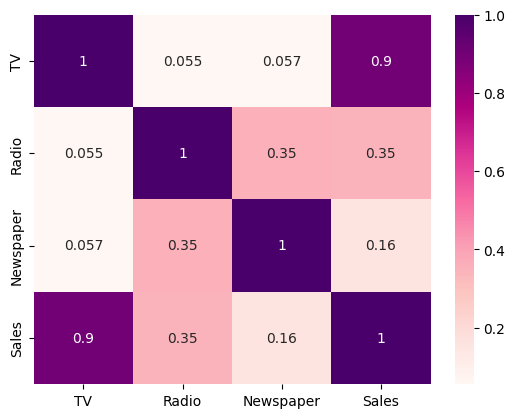

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = advertising.corr()
sns.heatmap(corrMatrix, annot=True, cmap='RdPu') 
plt.show()

# seaborn의 heatmap은 데이터프레임의 상관관계를 색상으로 표현
# 각 셀은 두 변수 사이의 상관계수를 나타내며, 색상은 상관계수의 크기 
# 데이타의 패턴을 빠르게 파악하는데 유용

In [10]:
# 히트맵을 기준으로 상관 관계가 높은 속성을 내림 차순으로 정렬하여 시각화

corr_sort = corrMatrix[['Sales']].sort_values(by='Sales', ascending= False)
corr_sort

,Sales
Sales,1.000000
TV,0.901208
Radio,0.349631
Newspaper,0.157960


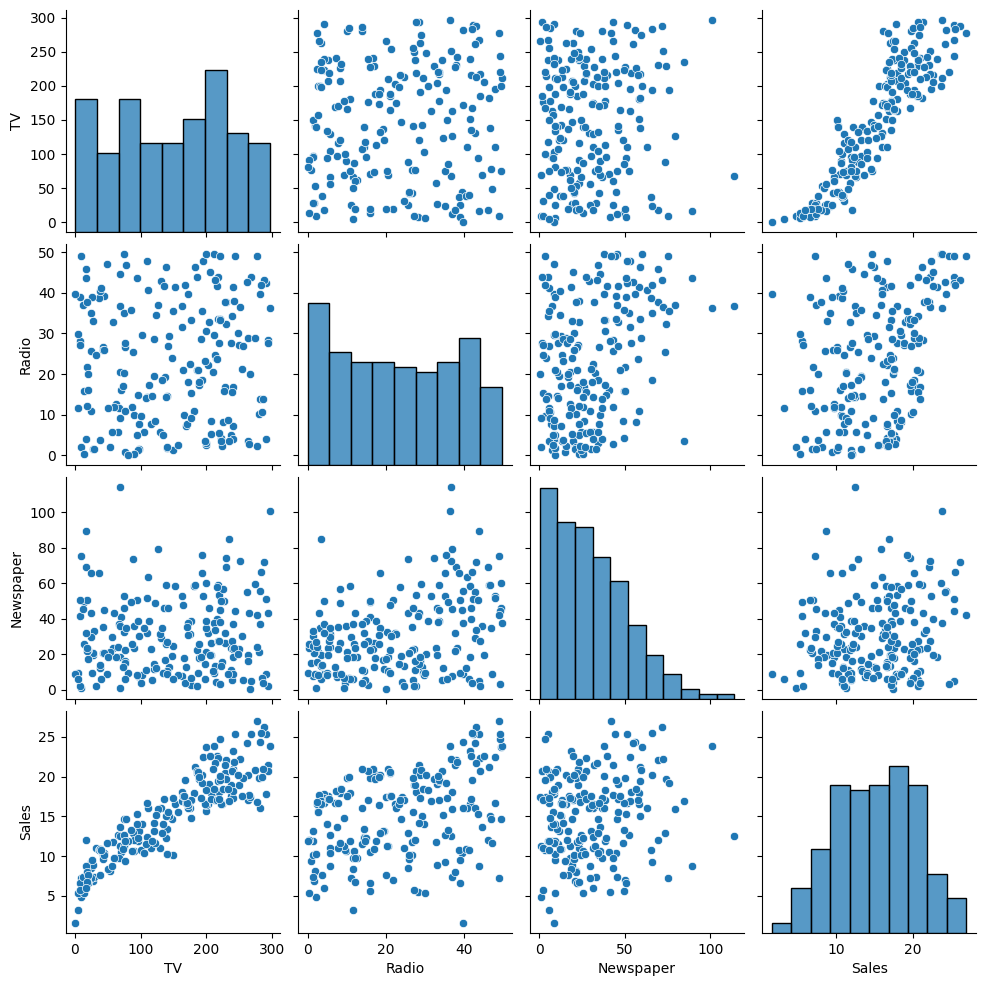

In [11]:
sns.pairplot(advertising)
plt.show()
# 파이썬의 seaborn 라이브러리에 있는 pairplot 함수는 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 산점도를 그립니다

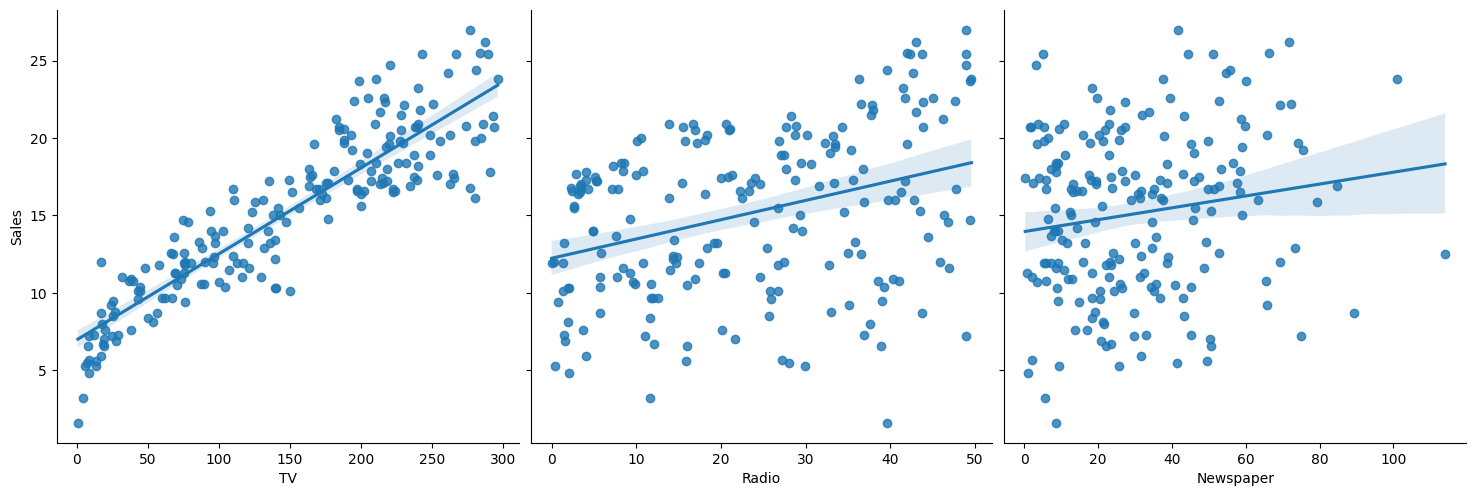

In [12]:
# 'TV', 'Radio', 'Newspaper'의 판매량 pairplot의 세개의 그래프만 그리면서 산점도(두 변수 간의 관계) 와 함께 선형회귀선 포함하여 시각화하기
import matplotlib.pyplot as plt
sns.pairplot(data = advertising, height=5, x_vars = ['TV', 'Radio', 'Newspaper'] , y_vars='Sales', kind='reg' )  #  'reg'는 회귀선을 포함하는 산점도를 의미
plt.show()
# eaborn의 pairplot 함수는 데이터셋 내의 수치형 변수들 간의 쌍별(pairwise) 관계를 시각화하는 데 사용됩니다

### 단순 선형 회귀

In [13]:
# 단순 선형 회귀로 모델 학습하고 평가하기

# 단순 선형 회귀는 두 변수 간의 관계를 모델링하는 통계적 방법입니다12345. 이때 두 변수는 독립변수와 종속변수로 구분됩니다12345.

# 독립변수(Independent Variable): 독립변수, 또는 설명변수라고도 하며, 종속변수에 영향을 주는 변수입니다12345. 예를 들어, 광고 지출이 제품 판매량에 어떤 영향을 미치는지 알아보는 경우, 광고 지출이 독립변수가 됩니다2.
# 종속변수(Dependent Variable): 종속변수, 또는 반응변수라고도 하며, 독립변수에 의해 영향을 받는 변수입니다12345. 위의 예에서 제품 판매량이 종속변수가 됩니다

In [14]:
#독립변수로 TV 컬럼만 가져온다.
X_data1 = advertising[['TV']]

#종속변수로 Sales 데이터를 가져온다
y_data1 = advertising['Sales']

display(X_data1)
display(y_data1)

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [15]:
# [데이타전처리] 
# 속성값의 차이가 있으므로 속성값의 범위를 일정하게 맞춰주는 방법으로 표준화 적용, 특성 간의 스케일 차이를 제거하고, 모든 특성이 동일한 중요도를 가지도록
# *표준화* 를 이용하여 평균이 0이고 표준편차가 1인 정규분포로 만들기
# pip install scikit-learn

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X_data1) # *표준화*
X_scaled1

array([[ 0.96985227],
       [-1.19737623],
       [-1.51615499],
       [ 0.05204968],
       [ 0.3941822 ],
       [-1.61540845],
       [-1.04557682],
       [-0.31343659],
       [-1.61657614],
       [ 0.61604287],
       [-0.94515567],
       [ 0.79002835],
       [-1.4390876 ],
       [-0.57850171],
       [ 0.66625345],
       [ 0.56466461],
       [-0.92530498],
       [ 1.56887609],
       [-0.90895735],
       [ 0.0030068 ],
       [ 0.8332328 ],
       [ 1.05509347],
       [-1.5628625 ],
       [ 0.94883389],
       [-0.98952781],
       [ 1.35285385],
       [-0.04837147],
       [ 1.08662104],
       [ 1.18820988],
       [-0.89260972],
       [ 1.70316018],
       [-0.3986778 ],
       [-0.58200477],
       [ 1.38438142],
       [-0.59952009],
       [ 1.67747105],
       [ 1.39956136],
       [-0.84473452],
       [-1.21372386],
       [ 0.94533082],
       [ 0.64757044],
       [ 0.34981006],
       [ 1.711334  ],
       [ 0.6989487 ],
       [-1.42390765],
       [ 0

In [16]:
# [데이터 분할] - 러닝머신 모델을 학습하고 테스트하기 위하여 - 모델성능평가와 과적합 방지
#  훈련 데이터와 테스트 데이터를 7:3 비율로 나누기, random_state = 10
from sklearn.model_selection import train_test_split

# train_test_split 함수는 데이터를 훈련 데이터와 테스트 데이터로 나누는 작업을 수행합니다.

X_train1, X_test1, y_train1, y_test1 = train_test_split( X_scaled1, y_data1, test_size=0.3, random_state=10)  # TODO:YOUR_CODE_HERE
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

# X_train1: 훈련 데이터 # X_test1: 테스트 데이터 - 각각 특성 테이터(독립변수)
# y_train1: 훈련 데이터 # y_test1: 테스트 데이터 - 각각 타겟 데이터(종속변수)

# X_scaled1: 특성 데이터 (스케일링된 데이터)
# y_data1: 타겟 데이터 (타겟 변수)
# test_size=0.3: 테스트 데이터의 비율 (30%)
# random_state=10: 랜덤 시드 값 (재현성을 위해 고정값 사용)
# 함수가 실행되면 훈련 데이터와 테스트 데이터를 반환합니다.

(140, 1) (60, 1) (140,) (60,)


In [17]:
# 이 때, X_scaled1는 독립변수(특성)이고, y_data1는 종속변수(타겟)입니다.

# 독립변수: 독립변수, 또는 특성(feature)은 예측 모델에서 입력으로 사용되는 변수입니다. 이 변수들은 종속변수를 예측하는 데 사용됩니다. 
#       여기서 X_scaled1는 독립변수를 포함하며, 이는 표준화된 특성 데이터입니다. X_train1은 훈련 데이터의 독립변수이고, X_test1은 테스트 데이터의 독립변수입니다.
# 종속변수: 종속변수, 또는 타겟(target)은 예측하려는 변수입니다. 이 변수는 독립변수에 의해 예측됩니다. 
#       여기서 y_data1는 종속변수를 포함하며, 이는 타겟 데이터입니다. y_train1은 훈련 데이터의 종속변수이고, y_test1은 테스트 데이터의 종속변수입니다.

In [18]:
# [학습: 선형 회귀 모델] - 입력 데이터와 정답 데이터를 모델에 입력하여 모델의 가중치를 업데이트합니다

from sklearn.linear_model import LinearRegression

lr_model1 = LinearRegression() # 선형 회귀 모델 생성 TODO:YOUR_CODE_HERE
lr_model1.fit(X_train1, y_train1) # 선형 회귀 모델 학습 TODO:YOUR_CODE_HERE

LinearRegression()

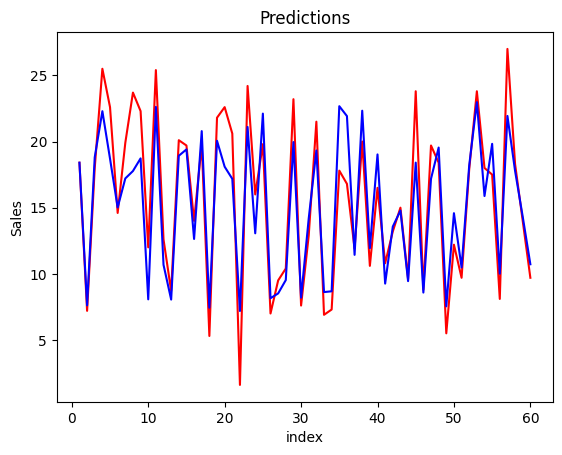

In [45]:
# [예측] 머신러닝 모델이 학습한 결과를 바탕으로 새로운 데이타에 대한 예측값 생성
# 머신러닝 모델을 사용하여 '테스트 데이터'에 대한 예측을 수행하고, '실제 값'과 예측 값을 비교하는 그래프를 생성 


y_pred1 = lr_model1.predict(X_test1)

c = [i for i in range(1, 61, 1)]
plt.plot(c, y_test1, color = 'r') # 실젯 타겟값
plt.plot(c, y_pred1, color = 'b') # 예측 타겟값
plt.xlabel('index') # X축 이름
plt.ylabel('Sales') # Y축 이름
plt.title('Predictions') # 그래프 제목
plt.show()

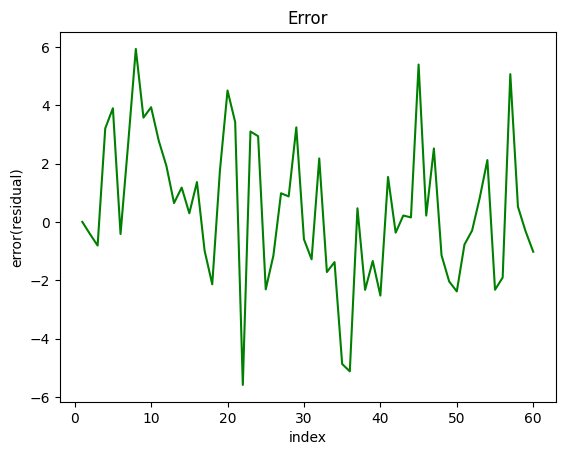

In [46]:
# 머신러닝 모델의 예측 오차를 계산하고, 이를 그래프로 시각화하는 코드

error = y_test1 - y_pred1
# y_test1은 테스트 데이터의 실제 종속변수 값이고, y_pred1은 테스트 데이터에 대한 모델의 예측값

plt.plot(c, error, color = 'g')
plt.xlabel('index')
plt.ylabel('error(residual)')
plt.title('Error')
plt.show()

In [21]:
# [평가 지표 구하기]
# 머신러닝 모델의 성능을 평가하는 데 사용되는 두 가지 메트릭, 즉 평균 제곱 오차(MSE)와 결정계수(R^2)를 계산하고 출력하는 코드 

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f'MSE: {mean_squared_error(y_test1, y_pred1):.2f}') # 평균 제곱 오차(MSE)
print(f'r2_score: {r2_score(y_test1, y_pred1):.2f}') # 결정계수(R2)

MSE: 6.46
r2_score: 0.83


In [ ]:
# mean_squared_error(y_test1, y_pred1): 이 부분은 **평균 제곱 오차(Mean Squared Error, MSE)**를 계산합니다1.
#    MSE는 실제 값(y_test1)과 예측 값(y_pred1) 사이의 차이를 제곱하여 평균낸 값입니다1. MSE는 회귀 문제에서 주로 사용되는 손실 함수로,
#    값이 작을수록 모델의 성능이 좋다는 것을 의미합니다
# r2_score(y_test1, y_pred1): 이 부분은 **결정계수(R^2 Score)**를 계산합니다2. R^2 Score는 회귀 모델의 성능을 평가하는 데 사용되는 통계적 지표로, 모델이 데이터를 얼마나 잘 설명하는지를 나타냅니다2.
#    R^2 Score는 0과 1 사이의 값을 가지며, 1에 가까울수록 모델의 성능이 좋다는 것을 의미합니다

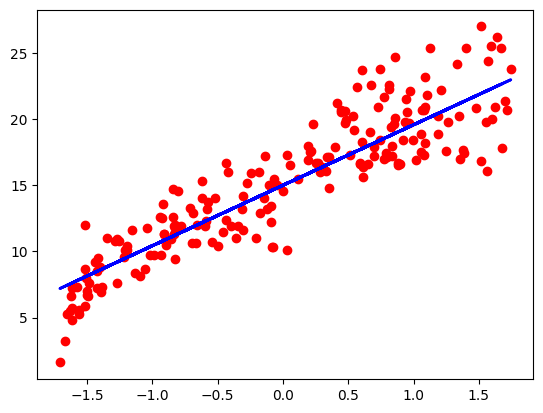

In [23]:
plt.scatter(X_scaled1, y_data1, color = 'red', label = 'scatter plot')
plt.plot(X_test1, y_pred1, color = 'blue', linewidth = 2, label = 'Regression Line')
plt.show()

In [24]:
# Slope Coefficients(기울기 계수)
w1 = lr_model1.coef_ # 기울기
print(f'slopes of TV: {w1[0]:.2f}')

# Intercept(절편)
b1 = lr_model1.intercept_ # y 절편
print('Intercept is:', b1.round(2))

# 의미하는 것은 y= 4.57x + 15 입니다.

slopes of TV: 4.57
Intercept is: 15.0


### 다중 선형 회귀

In [25]:
# 타겟과 속성 분리하기
X_data2 = advertising.drop(['Sales'], axis = 1) # TODO:YOUR_CODE_HERE
y_data2 = advertising['Sales'] # TODO:YOUR_CODE_HERE

In [26]:
# 속성값의 차이가 있으므로 범위를 일정하게 맞춰 주는 표준화 적용하기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X_data1)


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X_data2)# TODO:YOUR_CODE_HERE

In [28]:
# 훈련 데이터와 테스트 데이터를 7:3으로 나누기
# random_state 옵션을 사용하여 훈련 데이터와 테스트 데이터를 동일한 패턴으로 추출하기

In [29]:
from sklearn.model_selection import train_test_split

# TODO:YOUR_CODE_HERE
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y_data2, test_size=0.3, random_state=10)  # TODO:YOUR_CODE_HERE
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(140, 3) (60, 3) (140,) (60,)


In [30]:
# 모델 생성하고 학습시키기

In [31]:
from sklearn.linear_model import LinearRegression

lr_model2 = LinearRegression() # TODO:YOUR_CODE_HERE
lr_model2.fit(X_train2,y_train2) # TODO:YOUR_CODE_HERE

LinearRegression()

In [32]:
# 실제값과 예측값을 구해 데이터프레임 형태로 만들기

In [33]:
mlr = pd.DataFrame({'Actual_value': y_test2, 'Model prediction':lr_model2.predict(X_test2)})
mlr.head()

,Actual_value,Model prediction
59,18.4,19.127479
5,7.2,10.658525
20,18.0,19.356496
198,25.5,24.315643
52,22.6,20.751037


In [34]:
# 실제값과 예측값의 오차를 그래프로 표현

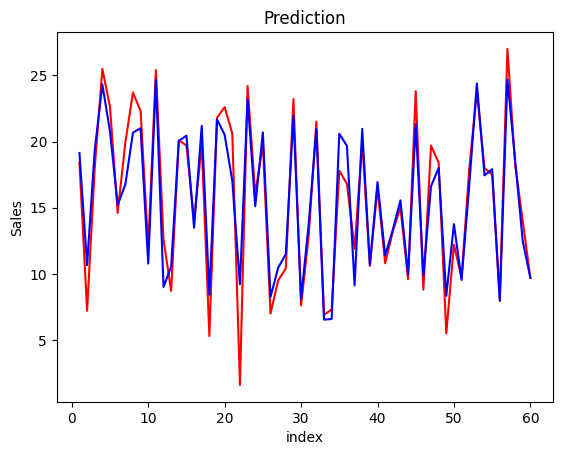

In [35]:
y_pred2 = lr_model2.predict(X_test2)
c = [i for i in range(1, 61, 1)]

plt.plot(c, y_test2, color = 'r')
plt.plot(c, y_pred2, color ='b')
plt.xlabel('index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

In [36]:
# 오차 그래프로 시각화하기

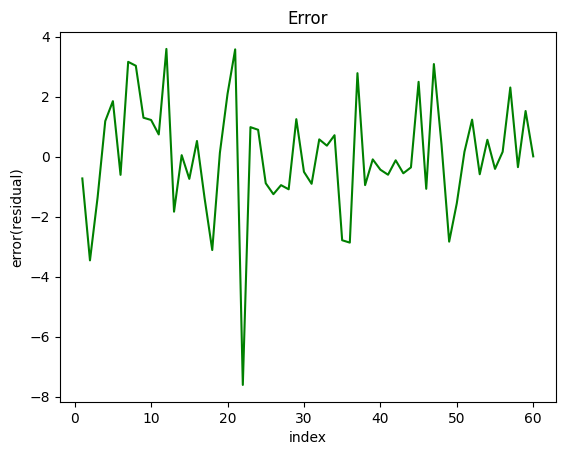

In [37]:
error2 = y_test2 - y_pred2 # TODO:YOUR_CODE_HERE
plt.plot(c, error2, color ='g')
plt.xlabel('index')
plt.ylabel('error(residual)')
plt.title('Error')
plt.show()

In [38]:
print(f'MSE:{mean_squared_error(y_test2, y_pred2):.2f}')
print(f'r2_score:{r2_score(y_test2, y_pred2):.2f}')

MSE:3.66
r2_score:0.90


In [39]:
# 기울기 계수
w2 = lr_model2.coef_ # TODO:YOUR_CODE_HERE
print(f'slopes of TV:{w2[0]:.2f}')
print(f'slopes of Radio:{w2[1]:.2f}')
print(f'slopes of Newspaper:{w2[2]:.2f}')

# 절편
b2 = lr_model2.intercept_ # TODO:YOUR_CODE_HERE
print('Intercept is:', b2.round(2))

# 의미하는 것은 y= 4.49x + 1.59x + 0.01x  +15.13 ????

slopes of TV:4.49
slopes of Radio:1.59
slopes of Newspaper:0.01
Intercept is: 15.13


### [더 자세히] - 경사 하강법

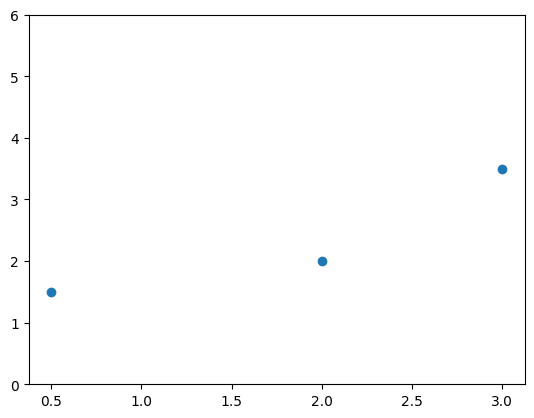

In [40]:
import matplotlib.pyplot as plt
x = [0.5, 2, 3]
y = [1.5, 2, 3.5]
plt.scatter(x, y)
plt.ylim(0, 6)
plt.show()

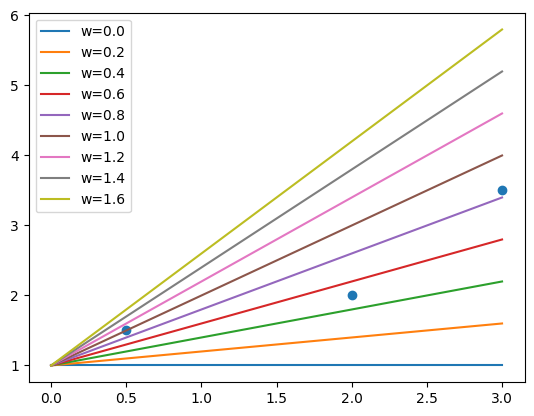

In [41]:
import numpy as np
plt.scatter(x, y)
x = np.arange(4)
w_range = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]

for w in w_range:
    y = w* x + 1
    plt.plot(x, y, label='w=' + str(w))
    plt.legend(loc = 'upper left')

In [42]:
data = [(0.5, 1.5),(2, 2), (3, 3.5)]

w_range = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]
result = []
b = 1

for w in w_range:
    sum = 0
    n = 0
    for (x, y) in data:
        y_hat = w * x + b
        n += 1
        sum += (y - y_hat)**2
    sum /= n
    result.append(round(sum, 3))
    print(f'w 값이 {w}일때 MSE 값: {sum:.3f}')

print(result)

w 값이 0.0일때 MSE 값: 2.500
w 값이 0.2일때 MSE 값: 1.377
w 값이 0.4일때 MSE 값: 0.607
w 값이 0.6일때 MSE 값: 0.190
w 값이 0.8일때 MSE 값: 0.127
w 값이 1.0일때 MSE 값: 0.417
w 값이 1.2일때 MSE 값: 1.060
w 값이 1.4일때 MSE 값: 2.057
w 값이 1.6일때 MSE 값: 3.407
[2.5, 1.377, 0.607, 0.19, 0.127, 0.417, 1.06, 2.057, 3.407]


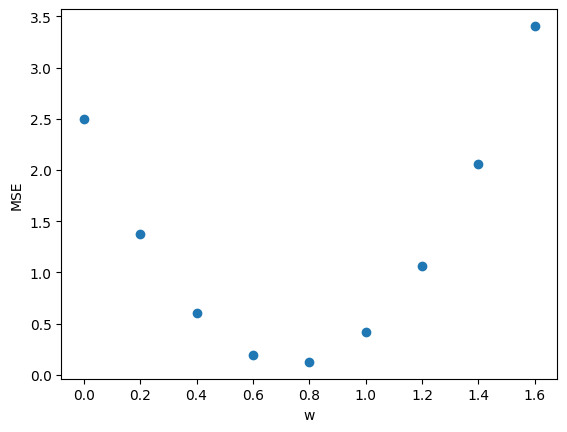

In [43]:
import matplotlib.pyplot as plt

plt.scatter(w_range, result)
plt.xlabel('w')
plt.ylabel('MSE')
plt.show()